In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.svm import SVC


In [2]:
ExcelTable = pd.ExcelFile('glass.xlsx')
Context = pd.read_excel(ExcelTable, 'Description')
df = pd.read_excel(ExcelTable, 'glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Checking for Missing Values

In [5]:
df.duplicated().sum()

1

In [6]:
df= df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

# Checking for Duplicate Values

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Summary Statistics

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Checking for Inconsistencies

In [10]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Correlation Analysis

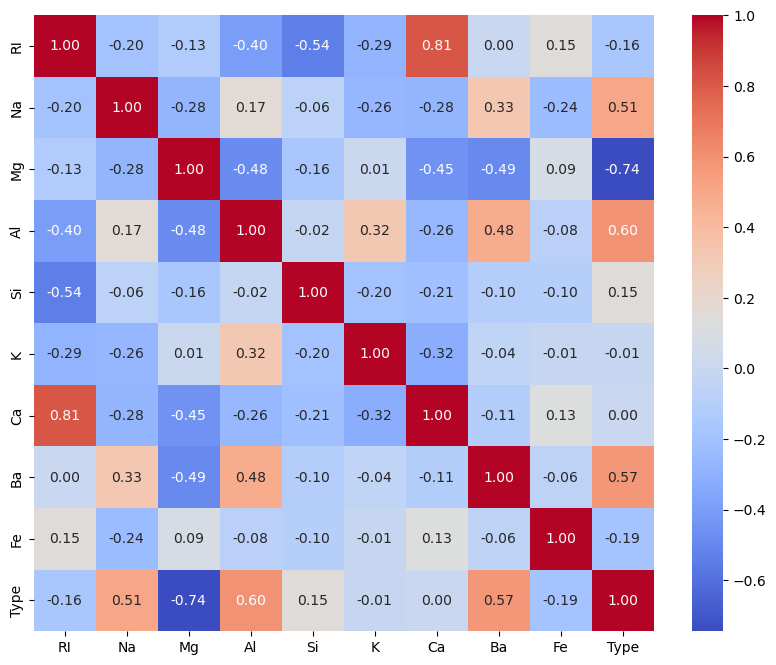

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Checking for Outliers

In [12]:
# IQR method for outlier detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier conditions
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition.any(axis=1)]
outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Visualizing the Data

<Figure size 1500x1000 with 0 Axes>

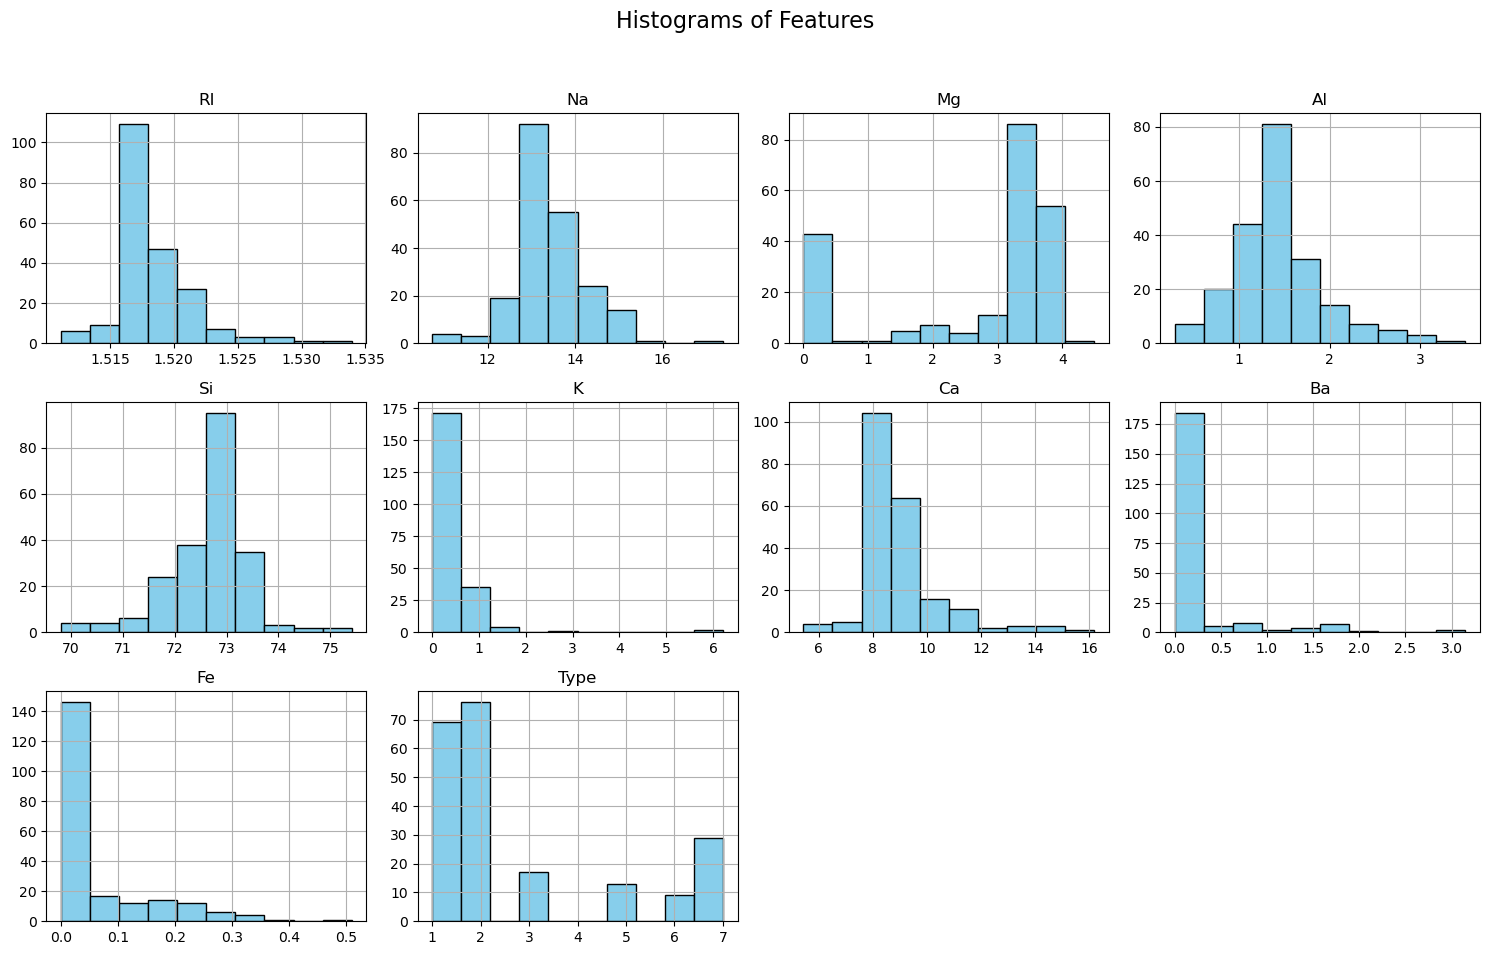

In [13]:
# 1. Histograms
num_features = len(df.columns)  # Get the number of features
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate number of rows needed

plt.figure(figsize=(15, 10))
df.hist(bins=10, figsize=(15, 10), layout=(num_rows, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

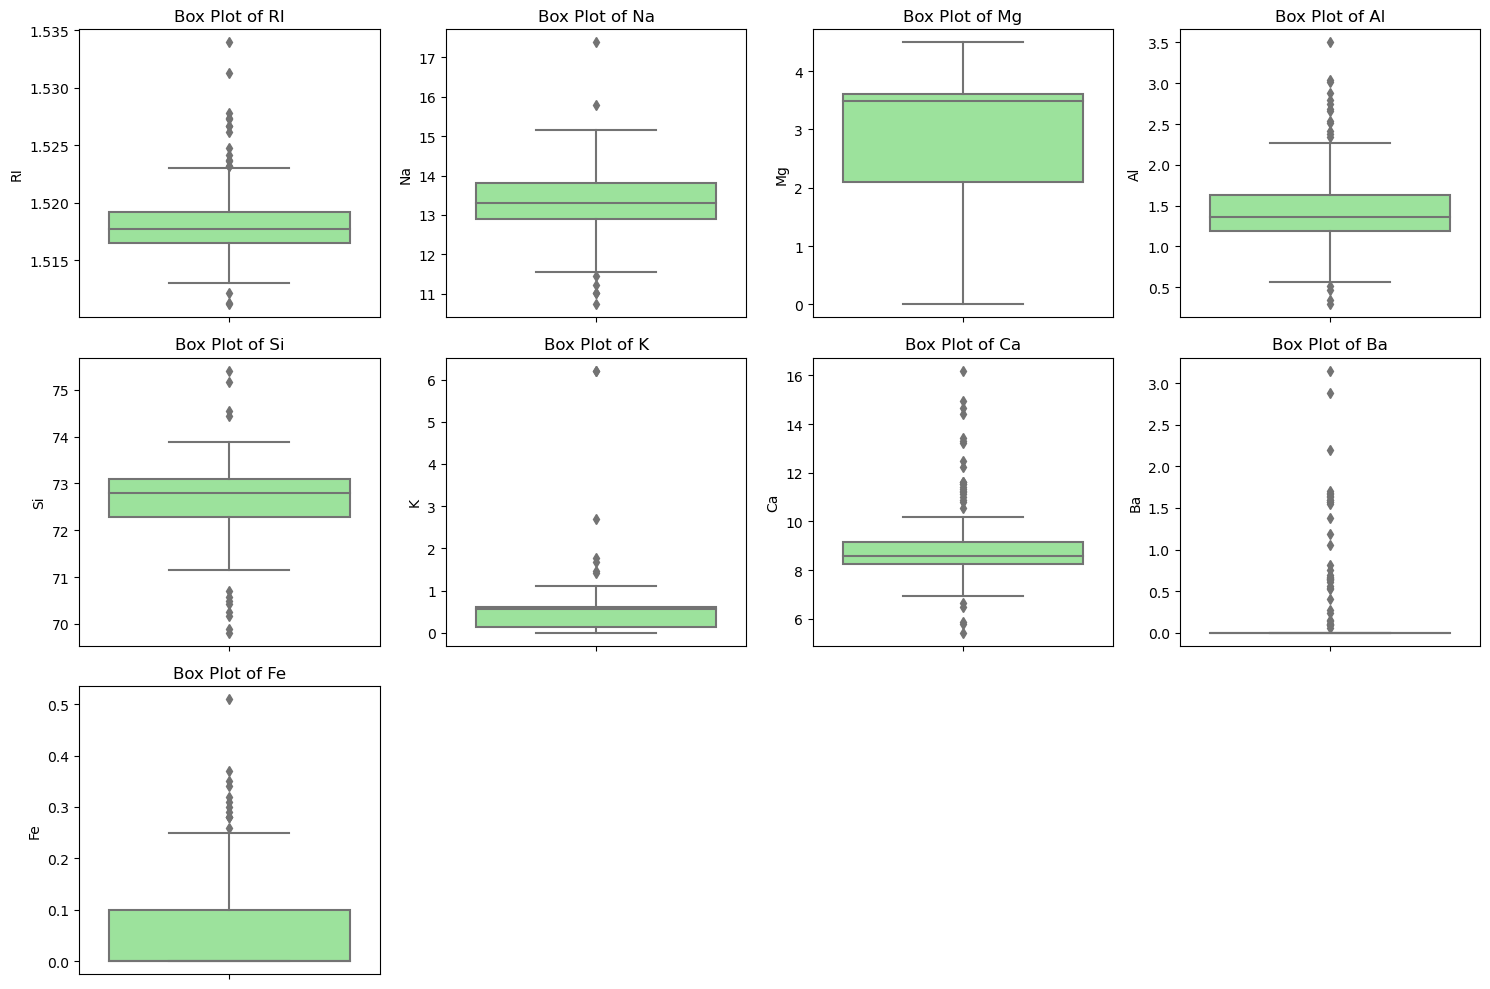

In [14]:
# 2. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'Type' for box plots
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [15]:
#sns.pairplot(df, hue = 'Type')

There is no need to encode any feauture

There are no missing values in the dataset so no imputation is required

lets get to model building

### Split the dataset into training and testing sets

In [16]:
# Define the target variable (Y)
Y = df['Type']
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [17]:
# Define the features (X) by dropping the target column
X = df.drop(columns=['Type'])
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [18]:
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)     #data is splited in traing and testing dataset

(170, 9) (170,) (43, 9) (43,)


# Handle Imbalance dataset

In [20]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [21]:
print(pd.Series(y_train).value_counts())

1    60
2    60
7    60
3    60
5    60
6    60
Name: Type, dtype: int64


## feature scaling

In [22]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
clf = RandomForestClassifier(n_estimators=100,random_state=42,max_features=3)
clf.fit(x_train, y_train)


# max_feautures == we have 9 independent feautures in our dataset so we are taking 3 feautures only because sqrt of N so sqrt of 9 is 3 

RandomForestClassifier(max_features=3, random_state=42)

In [24]:
# Predict on the test set
y_pred = clf.predict(x_test)
y_pred

array([7, 1, 2, 5, 1, 2, 1, 2, 2, 7, 1, 1, 2, 2, 2, 7, 2, 2, 3, 3, 6, 7,
       7, 7, 3, 1, 5, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 7, 2, 6, 2],
      dtype=int64)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.79


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.82      0.78      0.80        18
           3       0.75      0.50      0.60         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.80      0.79      0.79        43



### Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.

In [27]:
# Initialize the Bagging model (Random Forest)
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [28]:
bagging_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:

# Make predictions with Bagging model
y_pred_bagging = bagging_model.predict(x_test)
y_pred_bagging

array([7, 1, 2, 5, 1, 2, 1, 2, 2, 7, 1, 1, 2, 2, 2, 7, 2, 2, 3, 3, 6, 7,
       7, 7, 3, 1, 5, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 7, 2, 6, 2],
      dtype=int64)

In [30]:
# Evaluate the Bagging model
print("Bagging Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))

Bagging Model Performance:
Confusion Matrix:
[[ 7  2  0  0  0  0]
 [ 2 14  1  0  0  1]
 [ 2  1  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Accuracy: 0.7906976744186046

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.82      0.78      0.80        18
           3       0.75      0.50      0.60         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.80      0.79      0.79        43



In [31]:
# Initialize the Boosting model (AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)


In [32]:
# Train the Boosting model
boosting_model.fit(x_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [33]:
# Make predictions with Boosting model
y_pred_boosting = boosting_model.predict(x_test)

In [34]:
# Evaluate the Boosting model
print("\nBoosting Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_boosting))
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_boosting))



Boosting Model Performance:
Confusion Matrix:
[[ 3  6  0  0  0  0]
 [10  7  0  1  0  0]
 [ 2  3  1  0  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Accuracy: 0.4418604651162791

Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.33      0.25         9
           2       0.41      0.39      0.40        18
           3       1.00      0.17      0.29         6
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.44        43
   macro avg       0.58      0.48      0.48        43
weighted avg       0.52      0.44      0.43        43



In [35]:
# Compare the results
print("\nComparison of Bagging and Boosting:")
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}")
print(f"Boosting Accuracy: {accuracy_score(y_test, y_pred_boosting):.2f}")



Comparison of Bagging and Boosting:
Bagging Accuracy: 0.79
Boosting Accuracy: 0.44
